In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Our subject for this project will be finding a possible correlation between the number of Ubers picking up passengers and traffic volume for given hourly time ranges. The question we want to ask is does the time of uber pickup have any correlation with traffic volume at the time? Just to clarify, the time of uber pickup would be the number of uber called for a certain hourly time range. 

Originally, we wanted to work with multiple months, but ultimately we decided to only work with the month of September from the 13th and onwards. We chose this because we found that this has the most variation and 

Uber Data Source: https://data.world/data-society/uber-pickups-in-nyc

In [2]:
traffic_volume_raw = pd.read_csv("Traffic_Volume_Counts__2014-2018_.csv")
traffic_volume_raw.head()
print(traffic_volume_raw.columns)

Index(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')


why did we do this and how we chose our final clean data set to work with

In [3]:
#we have decided to look only at times from 7 AM - 6 PM for traffic volume

traffic_volume = traffic_volume_raw.drop(['12:00-1:00 AM','1:00-2:00AM',
                                          '2:00-3:00AM','3:00-4:00AM',
                                         '4:00-5:00AM','5:00-6:00AM',
                                          '6:00-7:00AM', '6:00-7:00PM',
                                          '7:00-8:00PM','8:00-9:00PM',
                                          '9:00-10:00PM','10:00-11:00PM',
                                          '11:00-12:00AM'], axis=1)

#traffic_volume is without the extra time as we are looking traffic volume during the workday. 

traffic_volume.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,9/13/2014,180.0,223.0,272.0,386.0,339.0,513,506,520,611,573,546
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,9/13/2014,219.0,226.0,273.0,317.0,325.0,403,414,379,376,329,362
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,9/13/2014,113.0,169.0,210.0,182.0,245.0,244,233,280,272,264,236
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,9/13/2014,142.0,198.0,212.0,205.0,237.0,257,245,237,276,223,240
4,62,147673,Broadway,West 242 Street,240 Street,SB,9/13/2014,354.0,473.0,567.0,634.0,781.0,785,779,732,809,707,675


In [4]:
#removed unecessary data to cleanup final dataframe
time_list = ['7:00-8:00AM','8:00-9:00AM','9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
             '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM']


day_list =  ['13','14','15','16','17','18','19','20',
           '21','22','23','24','25','26','27','28','29','30']

newday_list = []
day_list = list(map(lambda x : "9/{}/2014".format(x), day_list))
for day in day_list:
	rows = traffic_volume.loc[traffic_volume['Date'] == day]
	means_of_current_day = []
	for time in time_list:
		total = 0
		for i in range(len(rows)):
			j = rows.columns.get_loc(time)
			total += rows.iat[i,j]
		means_of_current_day.append(total/float(len(rows)))
	newday_list.append(means_of_current_day)

#making a new dataframe   
traffic_mean = pd.DataFrame(newday_list, columns = time_list, index = day_list)
traffic_mean.head()

,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM
9/13/2014,414.788732,531.323944,611.112676,666.450704,760.126761,794.619718,799.661972,821.873239,814.154930,846.323944,857.647887
9/14/2014,283.394366,363.802817,481.042254,620.633803,710.126761,753.577465,783.169014,799.985915,828.366197,840.028169,823.042254
9/15/2014,988.211268,988.690141,765.845070,653.788732,637.366197,665.816901,704.464789,789.619718,912.549296,977.619718,992.154930
9/16/2014,958.000000,895.887324,774.943662,663.028169,636.140845,637.084507,679.422535,773.802817,890.901408,974.140845,982.464789
9/17/2014,971.535211,937.338028,751.746479,644.619718,651.253521,666.098592,705.577465,833.309859,934.605634,967.845070,987.676056


explain what we did to get our final datasets

In [5]:
#inserting uber data
uber = pd.read_csv('uber-data.csv')

#number of days in september being analyzed
date_list = ['13','14','15','16','17','18','19','20',
            '21','22','23','24','25','26','27','28','29','30']

#number of hours
hours_list = ['7','8','9','10','11','12','13','14','15','16','17']
    
uber_data = uber["Date Called"].tolist()  

#counting each day and hour
total_list = []
uber_date = []
date_str = []
for date in date_list:
    find_date = ('9/'+date+'/2014')
    date_str.append(find_date)
    uber_date = [s for s in uber_data if find_date in s]
    for hour in hours_list:
        hour_str = " " + hour + ":"
        uber_hours = [s for s in uber_date if hour_str in s]
        count = len(uber_hours)
        total_list.append(count)

total_list = np.reshape(total_list, (len(date_list), len(hours_list)))
        
uber_counts = pd.DataFrame(total_list, columns = time_list, index = date_str)
uber_counts.head()
            

,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM
9/13/2014,249,353,437,479,526,572,661,983,1098,1092,1105
9/14/2014,211,293,365,413,543,506,540,559,638,662,679
9/15/2014,575,591,440,367,376,384,451,534,643,802,882
9/16/2014,849,918,762,686,498,474,536,643,801,858,964
9/17/2014,719,608,471,456,446,492,571,656,747,915,1037


explain what we did to get our final datasets 

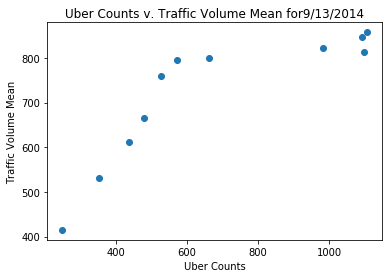

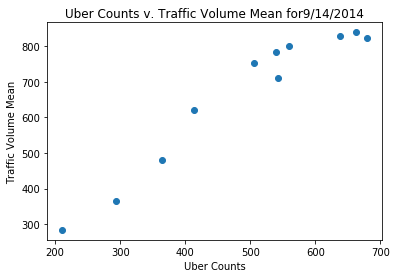

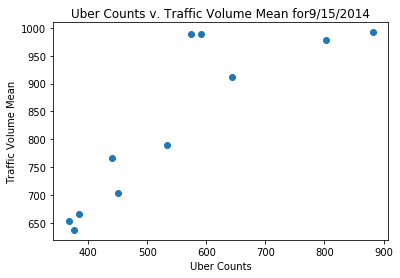

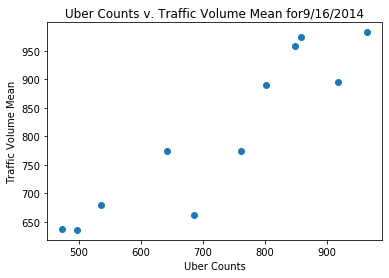

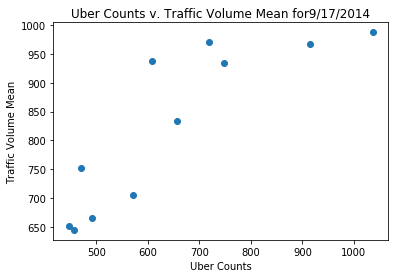

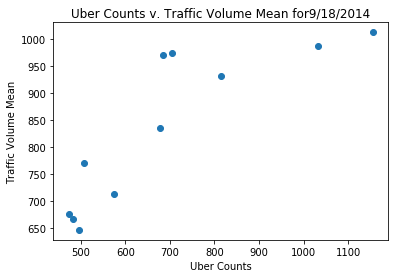

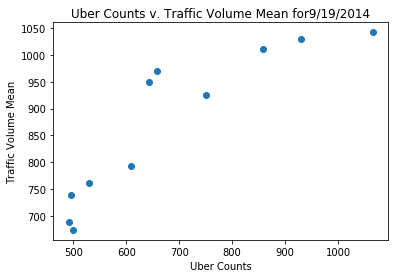

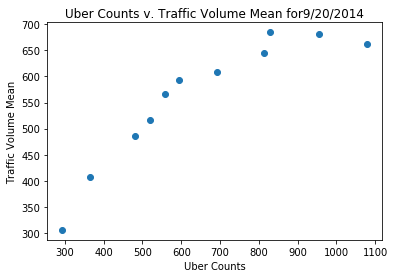

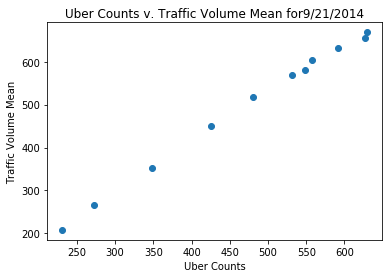

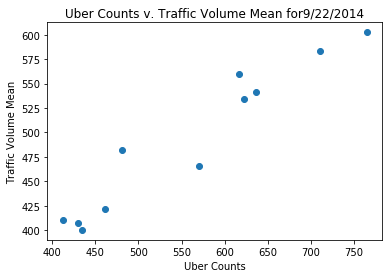

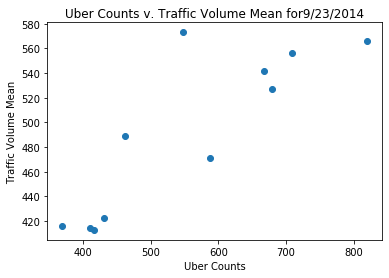

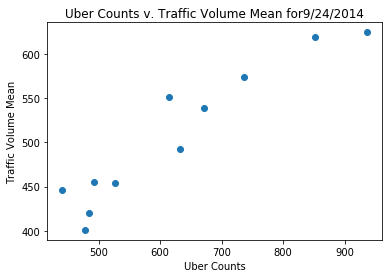

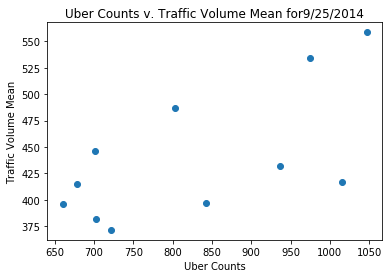

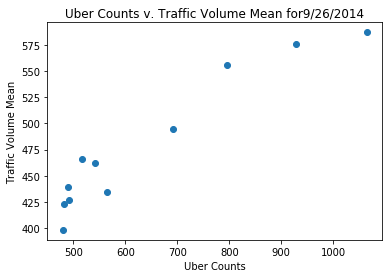

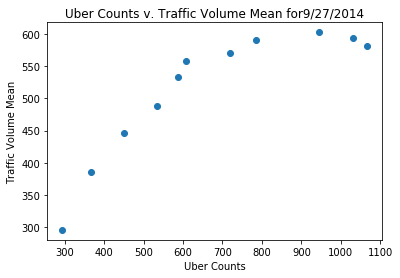

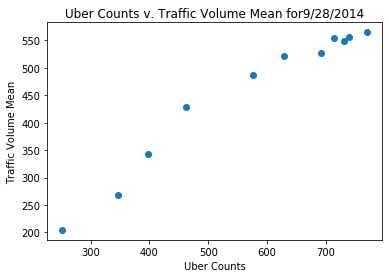

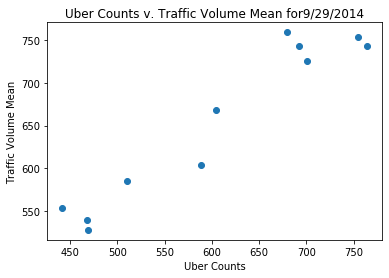

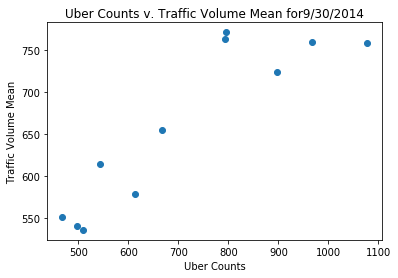

In [85]:
#Separate scatterplots for each date

for date in date_list:
    find_date = ('9/'+date+'/2014')
    plt.scatter(uber_counts.loc[find_date], traffic_mean.loc[find_date])
    plt.xlabel('Uber Counts')
    plt.ylabel('Traffic Volume Mean')
    plt.title('Uber Counts v. Traffic Volume Mean for'+find_date)
    plt.show()

#say something here

talk about next steps to take, why we chose to create these new dataframes

In [20]:
#make new dataframes for uber and traffic volume data for future Linear Regression 

newuber_df = pd.DataFrame(uber_counts.mean().to_dict(),index=[uber_counts.index.values[-1]])
newuber_df = newuber_df.rename(index = {'9/30/2014':'Uber Counts Mean'})
newuber_df.head()

,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM
Uber Counts Mean,559.111111,563.611111,505.111111,488.777778,504.0,503.333333,575.444444,673.888889,775.166667,865.222222,936.833333


In [22]:
newtraffic_df = pd.DataFrame(traffic_mean.mean().to_dict(), index = [traffic_mean.index.values[-1]])
newtraffic_df = newtraffic_df.rename(index = {'9/30/2014':'Traffic Volume Mean'})
newtraffic_df.head()

,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM
Traffic Volume Mean,586.349986,614.890602,556.154634,530.305455,551.968468,576.788778,600.1091,659.313755,718.491115,750.837422,754.831442


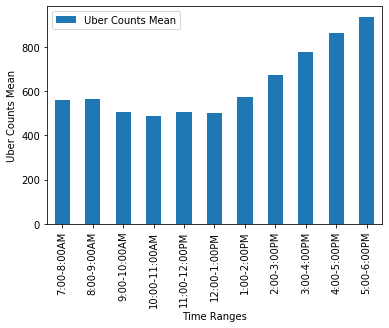

In [63]:
#Data Visualization for Uber Counts
newuber_df.plot.bar()
plt.xlabel('Time Ranges')
plt.ylabel('Uber Counts Mean')
plt.show()

Why we chose this data visualization and what it shows us and how it contributes to the question we want to answer and what not

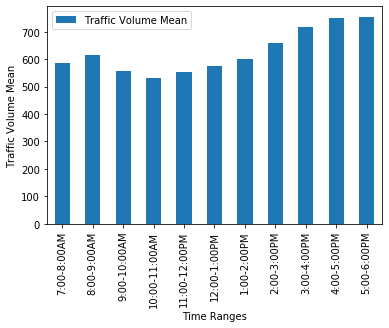

In [64]:
#Data Visualization for Traffic Volume
newtraffic_df.plot.bar()
plt.xlabel('Time Ranges')
plt.ylabel('Traffic Volume Mean')
plt.show()

What this shows about this data and how it contributes to answering our initial q

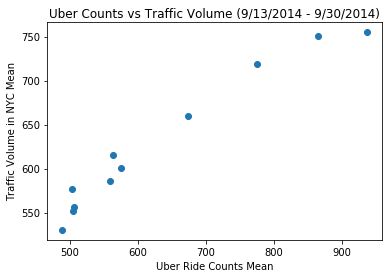

In [27]:
#Scatterplots

plt.scatter(newuber_df, newtraffic_df)
plt.xlabel('Uber Ride Counts Mean')
plt.ylabel('Traffic Volume in NYC Mean')
plt.title('Uber Counts vs Traffic Volume (9/13/2014 - 9/30/2014)')
plt.show()

#explain findings and shit and why we did this 

In [32]:
#Transposing Dataframes for Linear Regression
newuber_df = newuber_df.T
newuber_df.head()

,Uber Counts Mean
7:00-8:00AM,559.111111
8:00-9:00AM,563.611111
9:00-10:00AM,505.111111
10:00-11:00AM,488.777778
11:00-12:00PM,504.000000


In [33]:
newtraffic_df = newtraffic_df.T
newtraffic_df.head()

,Traffic Volume Mean
7:00-8:00AM,586.349986
8:00-9:00AM,614.890602
9:00-10:00AM,556.154634
10:00-11:00AM,530.305455
11:00-12:00PM,551.968468


why we transposed and what we plan on doing

In [46]:
#Linear Regression
model1 = LinearRegression().fit( newuber_df[['Uber Counts Mean']], newtraffic_df[['Traffic Volume Mean']] )
print ('The regression slope of model 1 is:',model1.coef_[0])
print ('The regression intercept of model 1 is:',model1.intercept_[0])
print ('The r-squared of model 1 is:',model1.score(newuber_df[['Uber Counts Mean']], newtraffic_df[['Traffic Volume Mean']] ))

The regression slope of model 1 is: [0.50143538]
The regression intercept of model 1 is: 310.43764774553574
The r-squared of model 1 is: 0.9592810330761794


explain findings and if it agrees with hypothesis and shits 